In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
x = torch.linspace(0,799,800)

In [ ]:
y = torch.sin(x*2*3.1416/40)

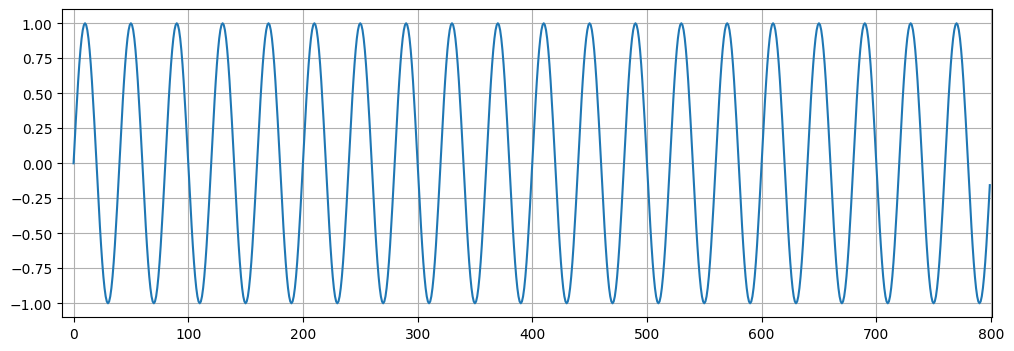

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())


In [ ]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

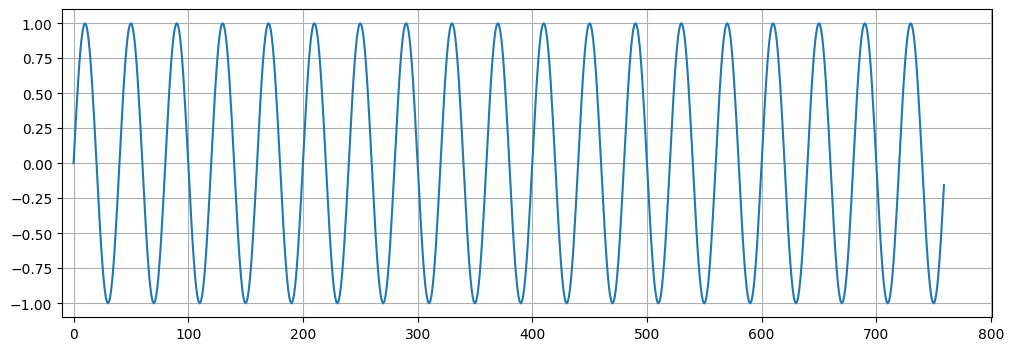

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [ ]:
a = [1,2,3,4,6,3,5,6,3,2,3,6,3,6,3,63,6,6,3,6,3,6,3,6,35,9]
ws = a[1:11]
print(ws)
print(a[11:11+1])

[2, 3, 4, 6, 3, 5, 6, 3, 2, 3]
[6]


In [ ]:
def input_data(seq, ws):

  out=[]
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))

  return out

In [ ]:
window_size = 40
train_data = input_data(train_set, window_size)

In [ ]:
len(train_data)

720

In [ ]:
train_data

[(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
           7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
           1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
           7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
          -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
          -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
          -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
          -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
  tensor([1.4480e-05])),
 (tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
           8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
           9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
           5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
          -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01

In [ ]:
class LSTM(nn.Module):

  def __init__(self,input_size=1,hidden_size=50,out_size=1):
    super().__init__()
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(input_size, hidden_size)

    self.linear = nn.Linear(hidden_size, out_size)

    #(H, c)
    self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

  def forward(self, seq):
    lstm_out , self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)

    pred = self.linear(lstm_out.view(len(seq), -1))

    return pred[-1]


In [ ]:
torch.manual_seed(42)

model = LSTM()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


Epoch 0 Loss: 0.012166413478553295
performance on test range: 0.36853644251823425
Epoch 1 Loss: 0.0015175410080701113
performance on test range: 0.10355286300182343
Epoch 2 Loss: 0.00021735693735536188
performance on test range: 0.022681932896375656
Epoch 3 Loss: 0.00012343161506578326
performance on test range: 0.013799825683236122
Epoch 4 Loss: 0.00012239842908456922
performance on test range: 0.011321001686155796
Epoch 5 Loss: 0.00012900467845611274
performance on test range: 0.009780468419194221
Epoch 6 Loss: 0.0001335304550593719
performance on test range: 0.008592719212174416
Epoch 7 Loss: 0.00013525340182241052
performance on test range: 0.007633673958480358
Epoch 8 Loss: 0.00013468523684423417
performance on test range: 0.0068472521379590034
Epoch 9 Loss: 0.00013241390115581453
performance on test range: 0.006196018308401108


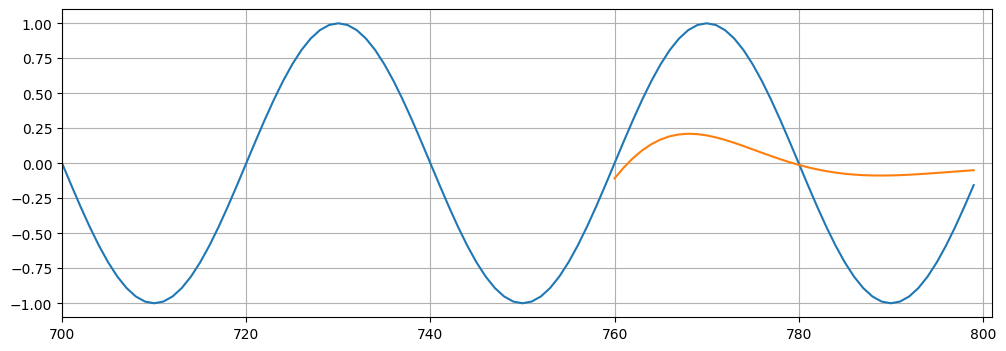

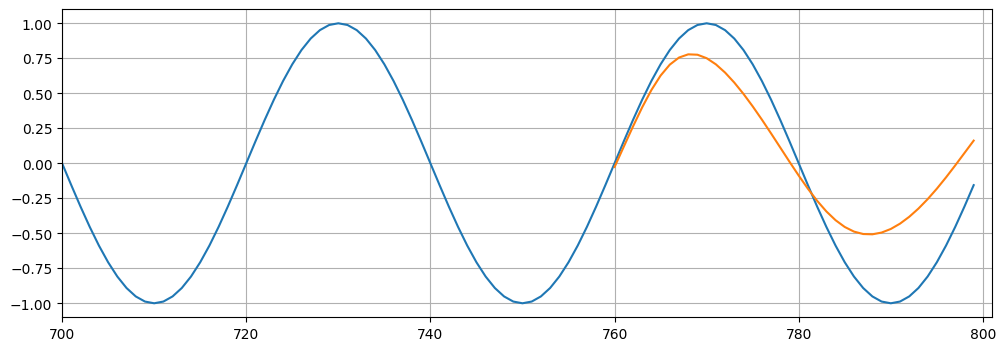

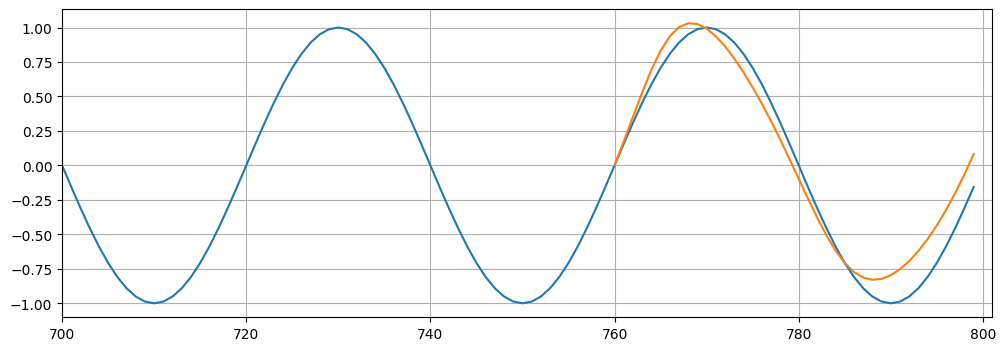

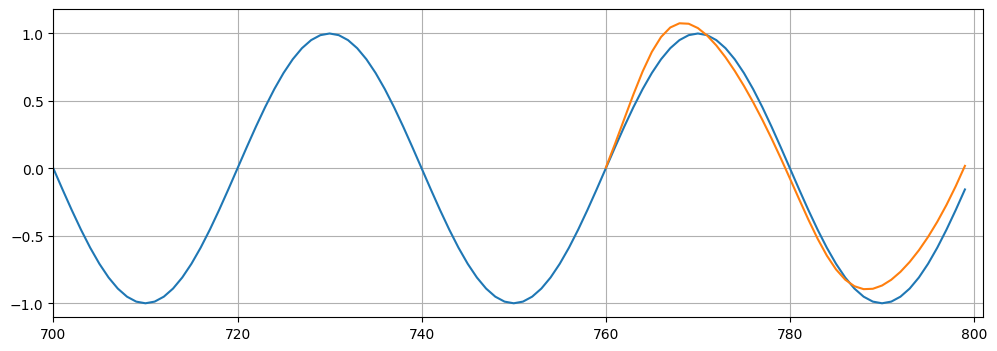

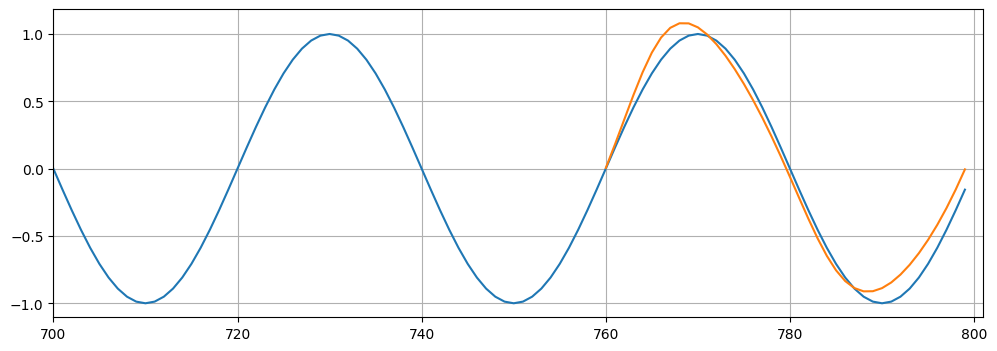

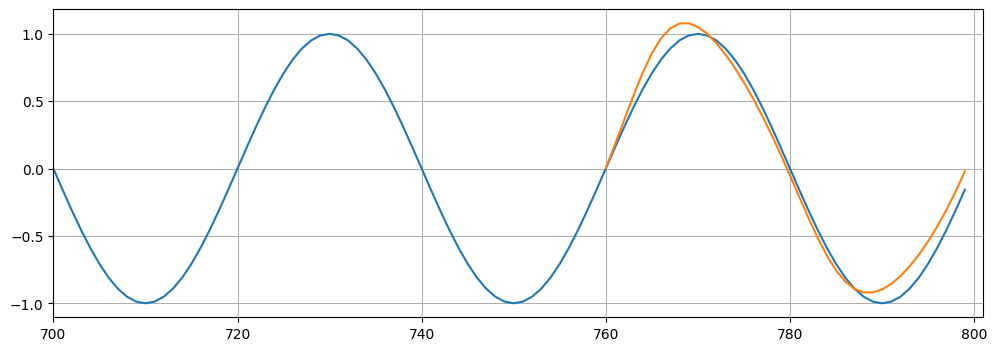

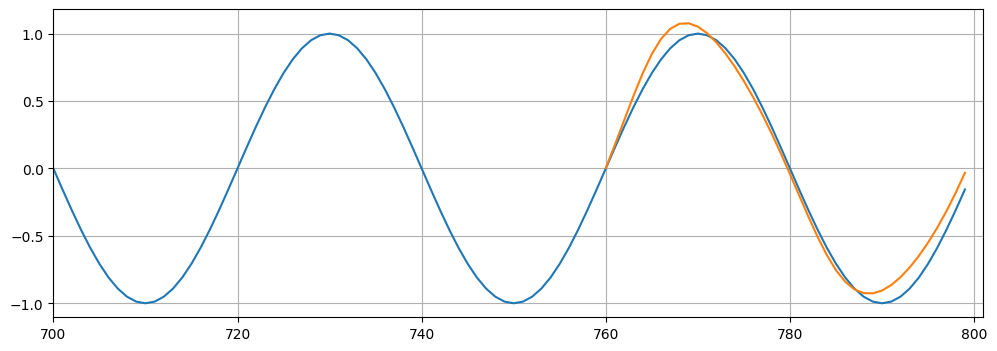

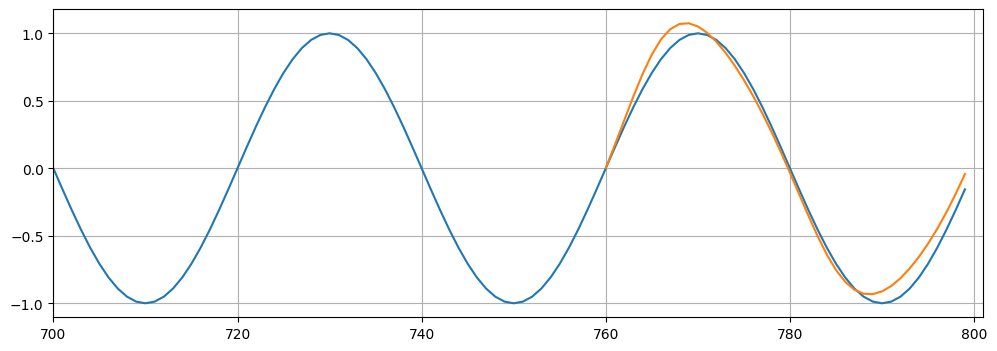

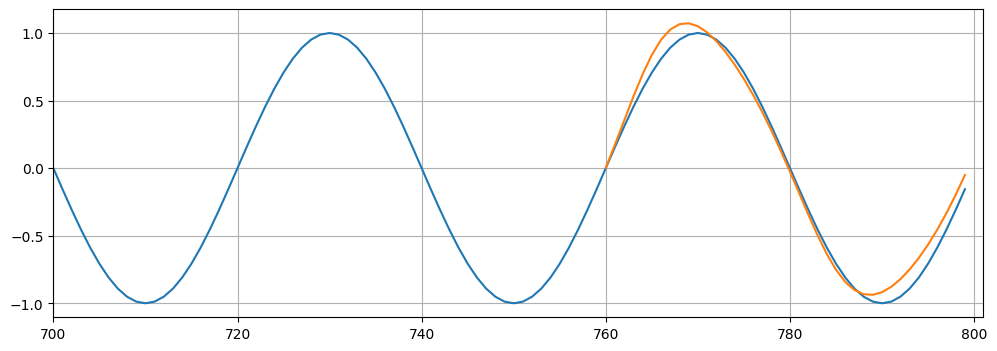

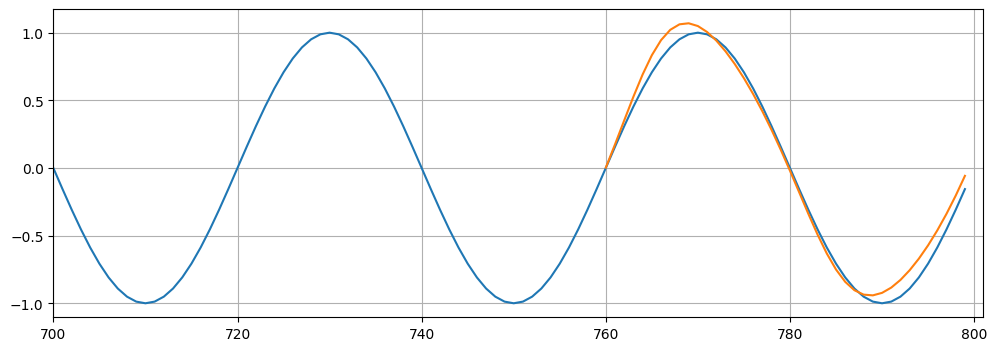

In [ ]:
epochs = 10

future = 40

for i in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),
                    torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f"Epoch {i} Loss: {loss.item()}")

  preds = train_set[-window_size:].tolist()

  for f in range(future):
      seq = torch.FloatTensor(preds[-window_size:])

      with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                    torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size:]), y[760:])

  print(f"performance on test range: {loss}")

  plt.figure(figsize=(12,4))
  plt.xlim(700,801)
  plt.grid(True)
  plt.plot(y.numpy())
  plt.plot(range(760, 800),preds[window_size:])
  plt.show